In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install opencv-python ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 8.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
!pip install opencv-python-headless

In [4]:
import os
import time
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO  # Replace with actual import paths
from tracker import Tracker


In [6]:
video_folder = '/content/traffictrim (1).mp4'
result_folder = '/content/drive/MyDrive/TrafficResult1'
os.makedirs(result_folder, exist_ok=True)


0: 640x576 3 cars, 1 truck, 195.7ms
Speed: 3.7ms preprocess, 195.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 576)

0: 640x576 1 car, 83.0ms
Speed: 2.6ms preprocess, 83.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)

0: 640x576 3 cars, 1 truck, 7.8ms
Speed: 3.4ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)

0: 640x576 (no detections), 47.3ms
Speed: 3.3ms preprocess, 47.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 576)

0: 640x576 4 cars, 1 truck, 7.7ms
Speed: 3.4ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Streaming output truncated to the last 5000 lines.
0: 640x576 2 persons, 1 car, 23.4ms
Speed: 3.3ms preprocess, 23.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)

0: 640x576 5 cars, 1 truck, 8.1ms
Speed: 5.4ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)

0: 640x576 1 person, 1 car, 23.4ms
Speed: 3.8ms preprocess, 23.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)

0: 640x576 5 cars, 1 truck, 9.2ms
Speed: 3.6ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)

0: 640x576 1 person, 1 car, 25.1ms
Speed: 3.5ms preprocess, 25.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)

0: 640x576 5 cars, 1 truck, 7.2ms
Speed: 3.6ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)

0: 640x576 1 car, 29.4ms
Speed: 3.4ms preprocess, 29.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 576)

0: 640x576 5 cars, 1 truck, 8.0ms

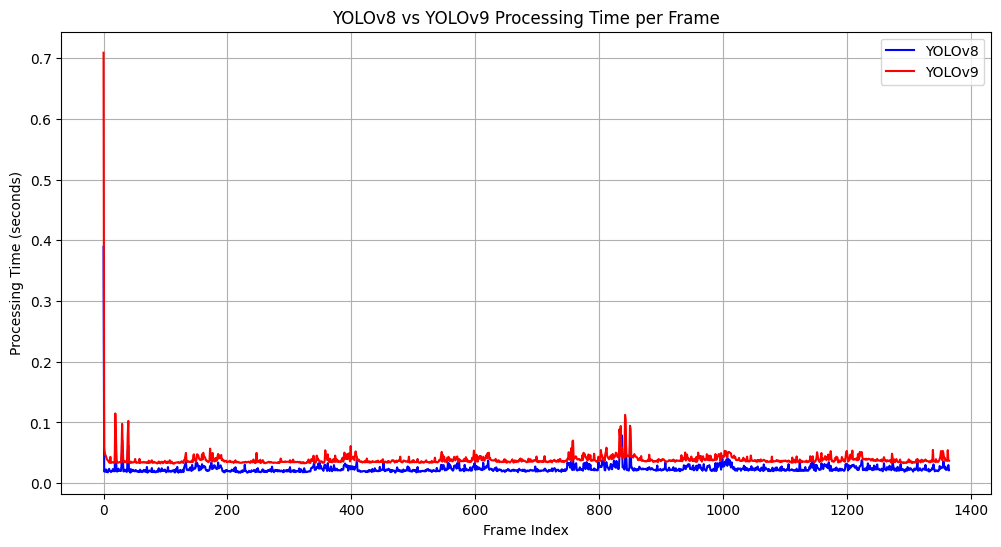

Frames processed with YOLOv8: 1366
Frames processed with YOLOv9: 1366


In [10]:
def process_video(video_path, yolov8_model, yolov9_model):
    """Processes a video with both YOLOv8 and YOLOv9, collecting processing times."""
    cap = cv2.VideoCapture(video_path)
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    output_video_path = os.path.join(result_folder, f'{video_name}_comparison_result.mp4')
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(output_video_path, fourcc, 30.0, (int(cap.get(3)), int(cap.get(4))))
    down = {}
    counter_down = set()
    yolov8_processing_times = []
    yolov9_processing_times = []

    try:
        tracker = Tracker()
        class_list = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

        while True:
            ret, frame = cap.read()
            if not ret:
                break

            combined_frame = frame.copy()

            # Process with YOLOv8 (left side)
            start_time_yolov8 = time.time()
            results_yolov8 = yolov8_model(frame[:, :frame.shape[1] // 2])
            boxes_yolov8 = results_yolov8[0].boxes.data.cpu().numpy()
            stop_time_yolov8 = time.time() - start_time_yolov8
            yolov8_processing_times.append(stop_time_yolov8)

            bbox_list_yolov8 = []
            for box in boxes_yolov8:
                x1, y1, x2, y2, _, class_id = box
                if int(class_id) < len(class_list) and class_list[int(class_id)] == 'car':
                    bbox_list_yolov8.append([int(x1), int(y1), int(x2), int(y2)])

            bbox_id_yolov8 = tracker.update(bbox_list_yolov8)
            for bbox in bbox_id_yolov8:
                x3, y3, x4, y4, id = bbox
                cx = (x3 + x4) // 2
                cy = (y3 + y4) // 2

                cv2.circle(combined_frame[:, :frame.shape[1] // 2], (cx, cy), 4, (0, 255, 0), -1)
                cv2.putText(combined_frame[:, :frame.shape[1] // 2], str(id), (cx, cy), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA)
                cv2.putText(combined_frame[:, :frame.shape[1] // 2], f'YOLOv8', (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
                cv2.putText(combined_frame[:, :frame.shape[1] // 2], f'Time: {stop_time_yolov8:.2f}s', (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)

            # Process with YOLOv9 (right side)
            start_time_yolov9 = time.time()
            results_yolov9 = yolov9_model(frame[:, frame.shape[1] // 2:])
            boxes_yolov9 = results_yolov9[0].boxes.data.cpu().numpy()
            stop_time_yolov9 = time.time() - start_time_yolov9
            yolov9_processing_times.append(stop_time_yolov9)

            bbox_list_yolov9 = []
            for box in boxes_yolov9:
                x1, y1, x2, y2, _, class_id = box
                if int(class_id) < len(class_list) and class_list[int(class_id)] == 'car':
                    bbox_list_yolov9.append([int(x1) + frame.shape[1] // 2, int(y1), int(x2) + frame.shape[1] // 2, int(y2)])

            bbox_id_yolov9 = tracker.update(bbox_list_yolov9)
            for bbox in bbox_id_yolov9:
                x3, y3, x4, y4, id = bbox
                cx = (x3 + x4) // 2
                cy = (y3 + y4) // 2

                cv2.circle(combined_frame[:, frame.shape[1] // 2:], (cx, cy), 4, (0, 0, 255), -1)
                cv2.putText(combined_frame[:, frame.shape[1] // 2:], str(id), (cx, cy), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
                cv2.putText(combined_frame[:, frame.shape[1] // 2:], f'YOLOv9', (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_AA)
                cv2.putText(combined_frame[:, frame.shape[1] // 2:], f'Time: {stop_time_yolov9:.2f}s', (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_AA)

            # Draw red line and car count (combined)
            red_color = (0, 0, 255)
            cv2.line(combined_frame, (282, 308), (1004, 308), red_color, 3)
            cv2.putText(combined_frame, 'red line', (280, 308), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
            downwards = len(counter_down)
            cv2.putText(combined_frame, f'going down - {downwards}', (60, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1, cv2.LINE_AA)

            for bbox_id in bbox_id_yolov8:
                x3, y3, x4, y4, id = bbox_id
                if y3 > 308 and id not in counter_down:
                    down[id] = y3
                    counter_down.add(id)
            for bbox_id in bbox_id_yolov9:
                x3, y3, x4, y4, id = bbox_id
                if y3 > 308 + frame.shape[1] // 2 and id not in counter_down:
                    down[id] = y3
                    counter_down.add(id)

            out.write(combined_frame)

    except Exception as e:
        print(f"Error processing video '{video_path}': {e}")
        raise

    cap.release()
    out.release()

    return yolov8_processing_times, yolov9_processing_times

if __name__ == '__main__':
    video_folder = '/content/traffictrim (1).mp4'
    result_folder = '/content/drive/MyDrive/TrafficResult1'

    if not os.path.exists(result_folder):
        os.makedirs(result_folder)

    yolov8_model = YOLO('yolov8n.pt')
    yolov9_model = YOLO('yolov9c.pt')


    all_yolov8_times = []
    all_yolov9_times = []

    yolov8_times, yolov9_times = process_video(video_folder, yolov8_model, yolov9_model)

        # Collect processing times
    all_yolov8_times.extend(yolov8_times)
    all_yolov9_times.extend(yolov9_times)

    # Optional: Generate performance graph (requires matplotlib)
    try:
        import matplotlib.pyplot as plt

        plt.figure(figsize=(12, 6))
        plt.plot(all_yolov8_times, label='YOLOv8', color='blue')
        plt.plot(all_yolov9_times, label='YOLOv9', color='red')
        plt.xlabel('Frame Index')
        plt.ylabel('Processing Time (seconds)')
        plt.title('YOLOv8 vs YOLOv9 Processing Time per Frame')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(result_folder, 'performance_comparison.png'))
        plt.show()
    except ImportError as e:
        print("matplotlib is not installed, skipping the performance graph generation.")
    except Exception as e:
        print(f"Error generating performance graph: {e}")

    print(f"Frames processed with YOLOv8: {len(all_yolov8_times)}")
    print(f"Frames processed with YOLOv9: {len(all_yolov9_times)}")

# Destroy all windows
cv2.destroyAllWindows()
